In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/newhousing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    int64  
 12  semi-furnished   545 non-null    int64  
 13  unfurnished      545 non-null    int64  
 14  areaperbedroom   545 non-null    float64
 15  bbratio          545 non-null    float64
dtypes: float64(2), int64(14)
memory usage: 68.2 KB


In [5]:
y = df['price']
X = df.drop('price', axis = 1)

In [6]:
y.shape

(545,)

In [7]:
X.shape

(545, 15)

In [8]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished', 'areaperbedroom', 'bbratio'],
      dtype='object')

In [9]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


<AxesSubplot:>

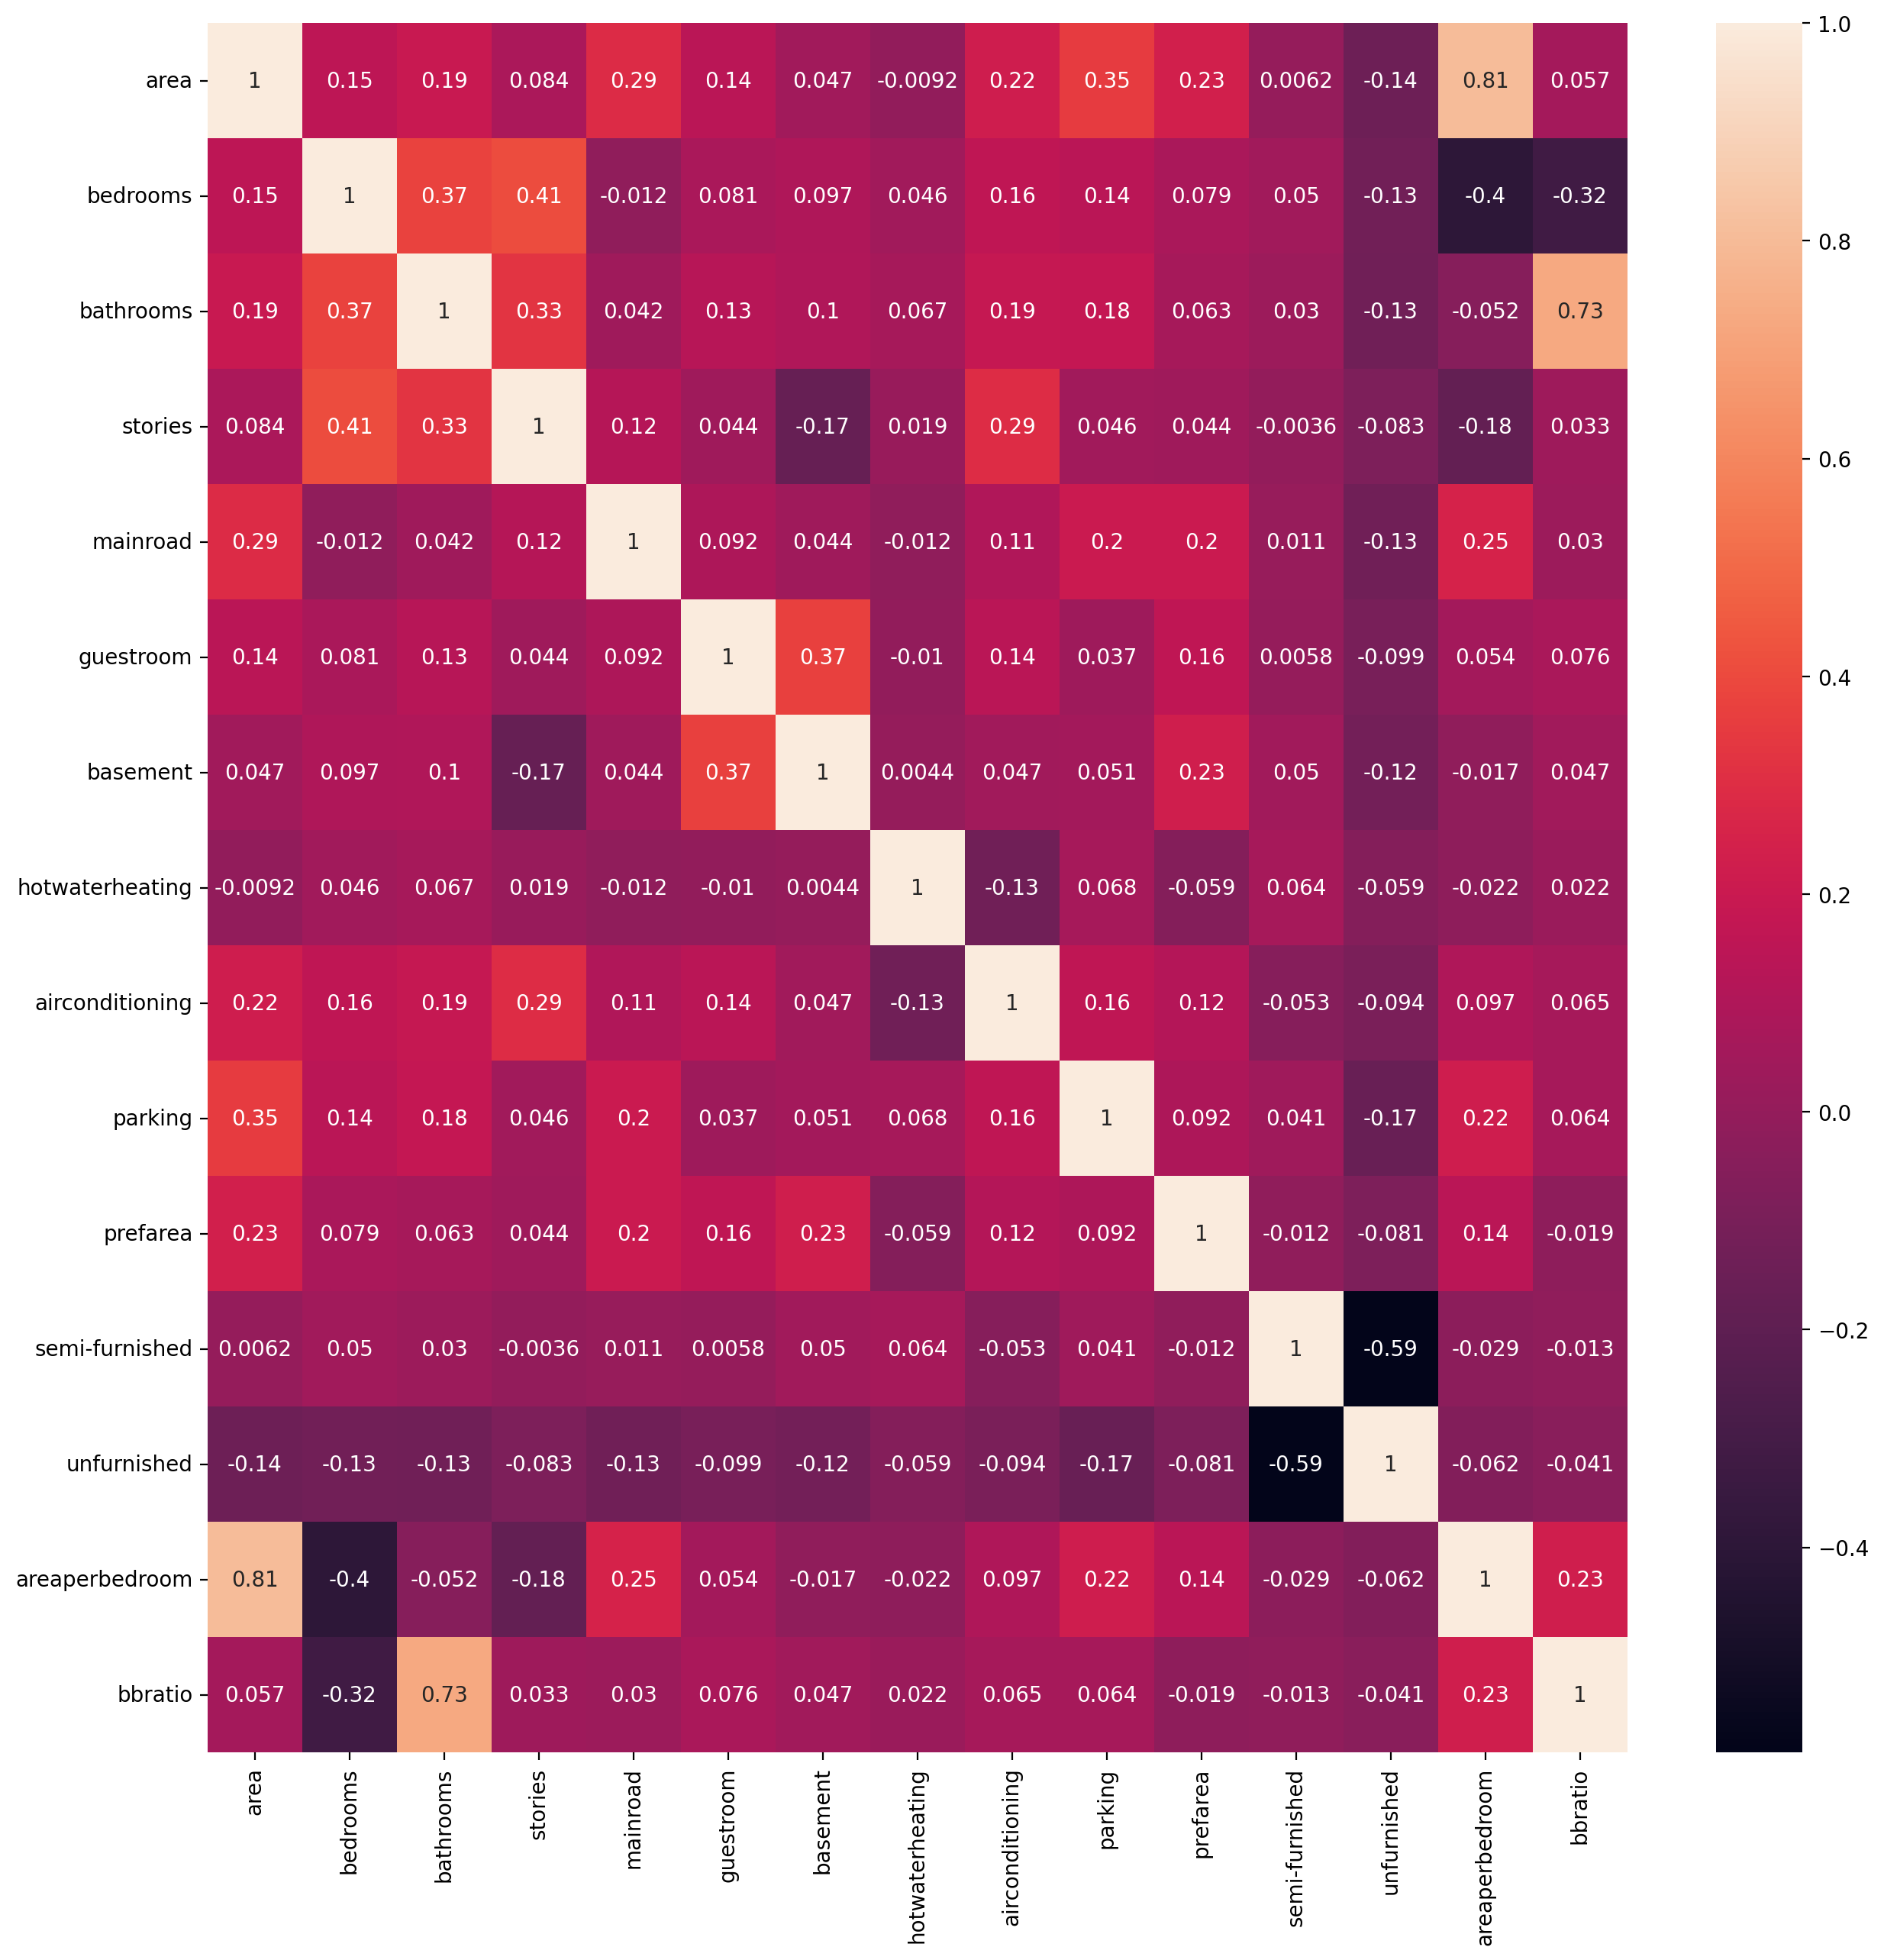

In [11]:
plt.figure(figsize = (15, 15), dpi = 200)
sns.heatmap(data = X.corr(), annot = True)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=100) 

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_scaler = scaler.fit(X_train)
Xtrain=X_scaler.transform(X_train) 
Xtest=X_scaler.transform(X_test) 
scaler = StandardScaler()
y_scaler = scaler.fit(y_train.values.reshape(-1,1))
ytrain=y_scaler.transform(y_train.values.reshape(-1,1)) 
ytest=y_scaler.transform(y_test.values.reshape(-1,1))

In [22]:
pca = PCA(n_components=6, random_state = 100)

In [23]:
pca_model = pca.fit(Xtrain)

In [24]:
pca_model.components_

array([[ 0.46691143,  0.13112306,  0.32062003,  0.18137141,  0.29897522,
         0.2020986 ,  0.14932445,  0.00493309,  0.25729459,  0.33219883,
         0.23612659,  0.11476112, -0.24709296,  0.34910288,  0.21942043],
       [ 0.25361401, -0.50199435, -0.32207257, -0.39103649,  0.13295656,
        -0.06013288, -0.04366134, -0.1227141 , -0.1130939 ,  0.04687925,
         0.04003649, -0.22426404,  0.22807543,  0.5187315 ,  0.02822955],
       [-0.08373087, -0.16054965,  0.49129155,  0.10515261, -0.07961017,
        -0.09855502, -0.2582783 ,  0.07651385, -0.06254503,  0.02406853,
        -0.28437482, -0.28436928,  0.26687278,  0.00714132,  0.62343997],
       [-0.09898262, -0.27890913,  0.04843568, -0.27820056, -0.11260759,
        -0.13636904,  0.0251793 ,  0.21412399, -0.2715405 ,  0.01344709,
        -0.14781668,  0.56817619, -0.51530461,  0.07396185,  0.2555627 ],
       [-0.19549875, -0.13507565,  0.12101414, -0.2726068 , -0.18120125,
         0.51633502,  0.61952357, -0.06312322, 

In [25]:
Xtrain_reduced = pca_model.transform(Xtrain)
Xtest_reduced = pca_model.transform(Xtest)

In [26]:
pca_model.explained_variance_ratio_

array([0.17657495, 0.13563483, 0.1110914 , 0.09817563, 0.0921252 ,
       0.07037984])

In [27]:
cumu = np.cumsum(pca_model.explained_variance_ratio_)
cumu

array([0.17657495, 0.31220978, 0.42330118, 0.52147681, 0.613602  ,
       0.68398184])

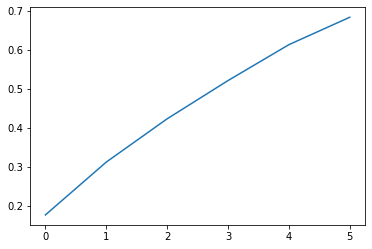

In [28]:
plt.plot(cumu)

In [29]:
reg_pca = LinearRegression()

In [31]:
reg_pca.fit(Xtrain_reduced, ytrain)


LinearRegression()

In [32]:
y_pred = reg_pca.predict(Xtest_reduced)

In [33]:
mean_squared_error(ytest, y_pred)

0.33329030741432736

In [37]:
reg_pca.fit(Xtrain_reduced, y_train)

LinearRegression()

In [38]:
y_pred = reg_pca.predict(Xtest_reduced)

In [39]:
mean_squared_error(y_test, y_pred)

1163319024808.5999

In [43]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

In [44]:
y_pred = lr.predict(Xtest)

In [45]:
mean_squared_error(ytest, y_pred)

0.34726864062565815